In [1]:
import igraph 
import networkx as nx

import sys
sys.path.append('../my_modules/')
from girwan_newman_benchmark import create_GN_benchmark_graph, evaluate_partition

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def nx_2_ig(nx_g):
    ig_g=igraph.Graph()
    
    #igraph docs say, you can add edges by name
    # but you actually cannot ...
    # so i have to maintain a name - id mapping
    id_name,name_id=dict(),dict()
    for node,i in zip(nx_g.nodes(),range(128)):
        ig_g.add_vertex(name=node)
        id_name[i],name_id[node]=node,i
    
    for edge in nx_g.edges():
        ig_g.add_edge(name_id[edge[0]],name_id[edge[1]])
 
    return ig_g,id_name,name_id

def evaluate_igraph_partition(member_list):
    correct=0
    for i in xrange(4):
        for j in range(32):
            if member_list[32*i+j]==i :
                correct+=1
    return correct/128.0

def test_igraph_method(k_in,igraph_method):
    graph,parts = create_GN_benchmark_graph(k_in=k_in)
    ig_g,id_name,name_id = nx_2_ig(graph)
    return evaluate_igraph_partition(igraph_method(ig_g).as_clustering(4).membership)

def repeat_test_igraph_method(k_in,igraph_method,M):
    corr_fracs=[test_igraph_method(k_in,igraph_method)  for x in xrange(M) ] 
    return np.mean(corr_fracs),np.std(corr_fracs)

def scan_k_in_vals(igraph_method,N,M,k_in_min=8,k_in_max=16):
    k_in_range=np.linspace(k_in_min,k_in_max,N)
    res = [ repeat_test_igraph_method(k_in,igraph_method,M)  for k_in in k_in_range ] 
    mean,std=np.array(res)[:,0],np.array(res)[:,1]
    return mean,std,k_in_range

In [3]:
GN=igraph.Graph.community_edge_betweenness
N_fast=igraph.Graph.community_fastgreedy

In [4]:
N,M=13,10
#GN_res,krange=scan_k_in_vals(GN,N=N,M=M)
N_fast_mean,N_fast_std,krange=scan_k_in_vals(N_fast,N=N,M=M)

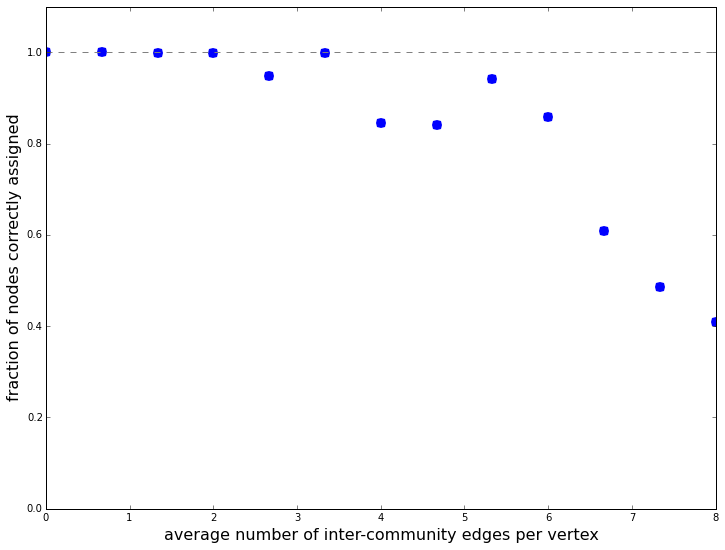

In [5]:
fig,ax=plt.subplots()
fig.set_size_inches(12,9)
ax.plot(16-krange,N_fast_mean,'o',ms=10,mec='none')
ax.axhline(1,linestyle='dashed',color='grey')
ax.set_ylim(0,1.1)
ax.set_xlabel('average number of inter-community edges per vertex',fontsize=16)
dump=ax.set_ylabel('fraction of nodes correctly assigned',fontsize=16)